## Glaucoma Detection on Imbalanced dataset and by using 2 sets of Augmentation

### Without Augmentation on imbalanced dataset

In [2]:
#Importing necessary Libraries
import numpy as np
import pandas as pd 
import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
%matplotlib inline
from tqdm import tqdm
import cv2

In [2]:
DATADIR = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined'

CATEGORIES = ["Positive", "Negative"]

IMAGE_SIZE = (200,200)
training_data = []
Class = []

#Function to read the image
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        
        #reading and resizing the image
        for img in tqdm(os.listdir(path)[1:]):  
            img_array = cv2.imread(os.path.join(path,img))  
            new_array = cv2.resize(img_array, (IMAGE_SIZE[0], IMAGE_SIZE[1]))  

             #Storing the image in a list   
            training_data.append(new_array) 
            #Storing the class of the image in a seperate list
            if category == 'Positive':
                Class.append(1)
            else:
                Class.append(0)

create_training_data()

100%|████████████████████████████████████████████████████████████████████████████████| 481/481 [00:33<00:00, 14.20it/s]


In [3]:
# Converting both the list into dataframe
df = pd.DataFrame({'Images': training_data,
                  'Class': Class})

In [4]:
df['Class'].value_counts()

0    481
1    166
Name: Class, dtype: int64

In [5]:
#Normalising the image
df['Images'] = df['Images']/255

x = df['Images']
y = df['Class']


#Splitting the image into train, test, and validation
from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(x_temp,y_temp,test_size = 0.2,train_size =0.80)

In [6]:
y_train.value_counts()

0    310
1    103
Name: Class, dtype: int64

In [7]:
y_test.value_counts()

0    98
1    32
Name: Class, dtype: int64

In [8]:
y_validation.value_counts()

0    73
1    31
Name: Class, dtype: int64

In [9]:
#Converting the dataframe into array format
X_image_train_stacked = np.stack(x_train.values)
X_image_validation_stacked = np.stack(x_validation.values)
X_image_test_stacked = np.stack(x_test.values)

In [10]:
x_train.shape

(413,)

In [11]:
X_image_train_stacked.shape

(413, 200, 200, 3)

In [12]:
#Training the CNN model
model = Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),                
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
              
hist=model.fit(X_image_train_stacked, y_train, epochs=10, validation_data=(X_image_validation_stacked,y_validation)) 

Epoch 1/10
13/13 [==============================] - 15s 992ms/step - loss: 0.6614 - accuracy: 0.7167 - val_loss: 0.6202 - val_accuracy: 0.7019
Epoch 2/10
13/13 [==============================] - 13s 1s/step - loss: 0.5697 - accuracy: 0.7506 - val_loss: 0.6504 - val_accuracy: 0.7019
Epoch 3/10
13/13 [==============================] - 11s 877ms/step - loss: 0.5537 - accuracy: 0.7506 - val_loss: 0.6101 - val_accuracy: 0.7019
Epoch 4/10
13/13 [==============================] - 14s 1s/step - loss: 0.5640 - accuracy: 0.7506 - val_loss: 0.6001 - val_accuracy: 0.7019
Epoch 5/10
13/13 [==============================] - 13s 1s/step - loss: 0.5564 - accuracy: 0.7506 - val_loss: 0.6094 - val_accuracy: 0.7019
Epoch 6/10
13/13 [==============================] - 12s 893ms/step - loss: 0.5604 - accuracy: 0.7506 - val_loss: 0.5977 - val_accuracy: 0.7019
Epoch 7/10
13/13 [==============================] - 12s 899ms/step - loss: 0.5748 - accuracy: 0.7506 - val_loss: 0.5928 - val_accuracy: 0.7019
Epoch 8/

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

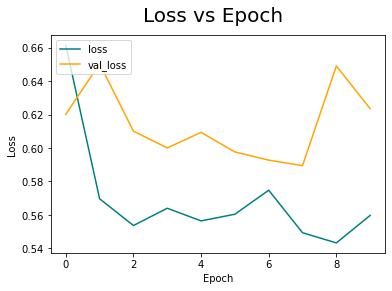

In [14]:
#Plot for loss vs epoch of the model
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss vs Epoch', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

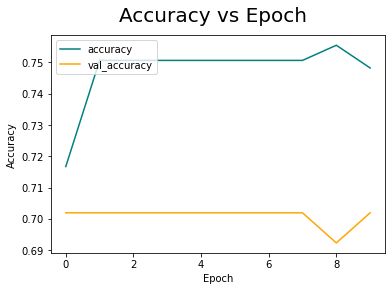

In [15]:
#Plot for Epoch vs Accuracy of the model
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy vs Epoch', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

#### Model Evaluation

In [16]:
#Printing the accuracy of the model
model.evaluate(X_image_test_stacked,y_test)

5/5 [==============================] - 1s 137ms/step - loss: 0.5969 - accuracy: 0.7538


[0.5969107747077942, 0.7538461685180664]

In [17]:
#Predicting for the test dataset
y_pred = model.predict(X_image_test_stacked)
y_pred_conv = []
for i in y_pred:
    if i[0] > i[1]:
        y_pred_conv.append(0)
    else:
        y_pred_conv.append(1)

5/5 [==============================] - 1s 135ms/step


ACCURACY SCORE:  0.7538461538461538
F1 score:  0.0

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        98
           1       0.00      0.00      0.00        32

    accuracy                           0.75       130
   macro avg       0.38      0.50      0.43       130
weighted avg       0.57      0.75      0.65       130

CONFUSION MATRIX:


C:\Users\nithu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nithu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nithu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


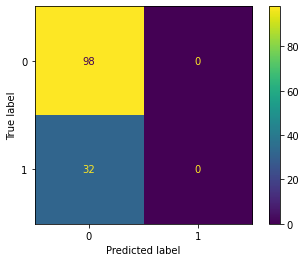

In [18]:
#Printing the classification report and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

print("ACCURACY SCORE: ", accuracy_score(y_test,y_pred_conv))
print('F1 score: ', f1_score(y_test,y_pred_conv))
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred_conv))
a = confusion_matrix(y_test,y_pred_conv)
result = ConfusionMatrixDisplay(a)
print("CONFUSION MATRIX:")
result.plot()
plt.show()

## Augmentation 1 (Using rotation, shift, shear, zoom, flip)

In [3]:
#Declaring the image size
IMAGE_SIZE = (200,200)
IMAGE_SIZE[1]

200

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
from skimage import io

In [6]:
#USing image data generator from keras for augmentation
datagen = ImageDataGenerator(
        rotation_range=15,     
        width_shift_range=0.2,   
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')

In [7]:
#Reading only the positive images from the directory
import os
from PIL import Image
import numpy as np

image_directory = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined\Positive/'
dataset = []
my_images = os.listdir(image_directory)

#Iterating through each images in the directory
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        #Reading the image
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        #Resizing the image
        image = image.resize((IMAGE_SIZE[0],IMAGE_SIZE[1]))
        #Appending to a list
        dataset.append(np.array(image))

x = np.array(dataset)

In [8]:
i = 0
#To generate batches of augmented data and saving the augmented images in the given directory
for batch in datagen.flow(x, batch_size=20,  
                          save_to_dir=r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined\Augmnented_images_Positive', 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 16:
        break  # To break the loop, otherwise the generator would loop indefinitely  

In [9]:
#Reading all the images including the augmented images
from tqdm import tqdm
import cv2
DATADIR = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined'

CATEGORIES = ["Positive", "Negative","Augmented_images_Positive"]

IMAGE_SIZE = (200,200)
training_data = []
Class = []
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)[1:]):  
            img_array = cv2.imread(os.path.join(path,img))  
            new_array = cv2.resize(img_array, (IMAGE_SIZE[0], IMAGE_SIZE[1]))  

                
            training_data.append(new_array)  
            if category == 'Positive':
                Class.append(1)
            elif category == 'Augmented_images_Positive':
                Class.append(1)
            else:
                Class.append(0)

create_training_data()

100%|██████████████████████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 1008.20it/s]


In [10]:
df = pd.DataFrame({'Images': training_data,
                  'Class': Class})

In [11]:
df['Class'].value_counts()

1    492
0    481
Name: Class, dtype: int64

In [12]:
df['Images'] = df['Images']/255
x = df['Images']
y = df['Class']

#Splitting the data
from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(x_temp,y_temp,test_size = 0.2,train_size =0.80)

In [13]:
X_image_train_stacked = np.stack(x_train.values)
X_image_validation_stacked = np.stack(x_validation.values)
X_image_test_stacked = np.stack(x_test.values)

In [14]:
#training the CNN model
model2 = Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),                
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
              
hist2=model2.fit(X_image_train_stacked, y_train, epochs=10, validation_data=(X_image_validation_stacked,y_validation)) 

Epoch 1/10
20/20 [==============================] - 20s 931ms/step - loss: 0.6792 - accuracy: 0.7395 - val_loss: 0.4001 - val_accuracy: 0.8269
Epoch 2/10
20/20 [==============================] - 18s 890ms/step - loss: 0.4013 - accuracy: 0.8215 - val_loss: 0.4217 - val_accuracy: 0.8141
Epoch 3/10
20/20 [==============================] - 18s 883ms/step - loss: 0.3872 - accuracy: 0.8296 - val_loss: 0.3953 - val_accuracy: 0.8205
Epoch 4/10
20/20 [==============================] - 18s 916ms/step - loss: 0.3994 - accuracy: 0.8248 - val_loss: 0.4062 - val_accuracy: 0.8141
Epoch 5/10
20/20 [==============================] - 18s 885ms/step - loss: 0.4047 - accuracy: 0.8280 - val_loss: 0.4045 - val_accuracy: 0.8205
Epoch 6/10
20/20 [==============================] - 17s 868ms/step - loss: 0.3955 - accuracy: 0.8232 - val_loss: 0.4087 - val_accuracy: 0.8205
Epoch 7/10
20/20 [==============================] - 18s 914ms/step - loss: 0.3766 - accuracy: 0.8296 - val_loss: 0.3960 - val_accuracy: 0.8269

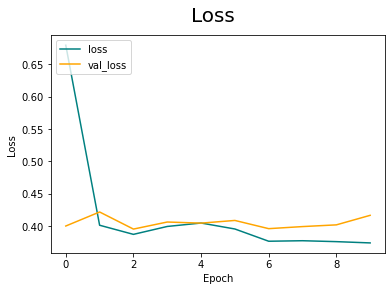

In [15]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

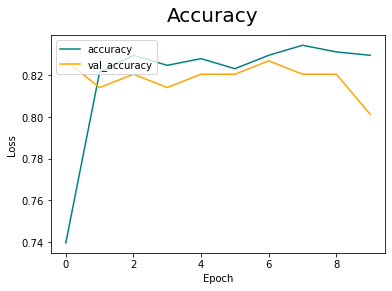

In [16]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [17]:
#Printing the accuracy of the model
model2.evaluate(X_image_test_stacked,y_test)

7/7 [==============================] - 1s 148ms/step - loss: 0.3962 - accuracy: 0.8103


[0.39624860882759094, 0.8102564215660095]

In [18]:
#Predicting for the test dataset
y_pred = model2.predict(X_image_test_stacked)
y_pred_conv = []
for i in y_pred:
    if i[0] > i[1]:
        y_pred_conv.append(0)
    else:
        y_pred_conv.append(1)

7/7 [==============================] - 1s 153ms/step


ACCURACY SCORE:  0.8102564102564103
F1 score:  0.7836257309941521

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        95
           1       0.94      0.67      0.78       100

    accuracy                           0.81       195
   macro avg       0.84      0.81      0.81       195
weighted avg       0.84      0.81      0.81       195

CONFUSION MATRIX:


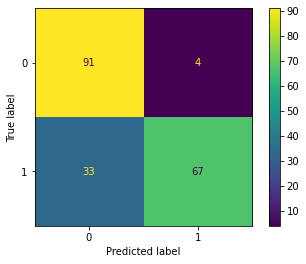

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

print("ACCURACY SCORE: ", accuracy_score(y_test,y_pred_conv))
print('F1 score: ', f1_score(y_test,y_pred_conv))
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred_conv))
a = confusion_matrix(y_test,y_pred_conv)
result = ConfusionMatrixDisplay(a)
print("CONFUSION MATRIX:")
result.plot()
plt.show()

## Augmentation: 2 (Using hue,contrast,saturation, and greyscale)

In [34]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import cv2

#Using imgaug library to augment the images based on hue, saturation and contrast
seq = iaa.Sequential([
    iaa.Multiply((0.5, 1.5)), # multiply image intensity by 0.5 to 1.5
    iaa.AddToHueAndSaturation((-10, 10)), # add/subtract -50 to 50 to hue and saturation
    iaa.LinearContrast((0.5, 2.0)), # adjust contrast by a factor of 0.5 to 2.0
    iaa.Grayscale(alpha=(0.0, 1.0)) # convert image to grayscale with alpha 0.0 to 1.0
])


In [35]:
#Initialisng the current directory and the directory to save the new augmented images
data_dir = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined\Positive/'
save_dir = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined\Augemnted_images_positive_pixels/'

#Generating augmented images
for i in range(2):
    for filename in tqdm(os.listdir(data_dir)):
        image = io.imread(os.path.join(data_dir, filename))
        augmented_image = seq.augment_image(image)
        io.imsave(os.path.join(save_dir, "augmented_"+str(i)+ filename), augmented_image)

100%|████████████████████████████████████████████████████████████████████████████████| 167/167 [04:46<00:00,  1.72s/it]


In [36]:
#Reading all the images including the augmented images
from tqdm import tqdm

DATADIR = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\Fundus_Train_Val_Data\Fundus_Combined'

CATEGORIES = ["Positive", "Negative","Augemnted_images_positive_pixels"]

IMAGE_SIZE = (200,200)
training_data = []
Class = []
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)[1:]):  
            img_array = io.imread(os.path.join(path,img))  
            new_array = cv2.resize(img_array, (IMAGE_SIZE[0], IMAGE_SIZE[1]))  

                
            training_data.append(new_array)  
            if category == 'Positive':
                Class.append(1)
            elif category == 'Augemnted_images_positive_pixels':
                Class.append(1)
            else:
                Class.append(0)

create_training_data()

100%|████████████████████████████████████████████████████████████████████████████████| 333/333 [00:30<00:00, 10.94it/s]


In [37]:
df2 = pd.DataFrame({'Images': training_data,
                  'Class': Class})

In [38]:
df2['Class'].value_counts()

1    499
0    481
Name: Class, dtype: int64

In [39]:
df2['Images'] = df2['Images']/255
x = df2['Images']
y = df2['Class']

#Splitting the data
from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(x_temp,y_temp,test_size = 0.2,train_size =0.80)

In [40]:
X_image_train_stacked = np.stack(x_train.values)
X_image_validation_stacked = np.stack(x_validation.values)
X_image_test_stacked = np.stack(x_test.values)

In [41]:
#Training the CNN model
model3 = Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),                
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
              
hist3=model3.fit(X_image_train_stacked, y_train, epochs=10, validation_data=(X_image_validation_stacked,y_validation)) 

Epoch 1/10
20/20 [==============================] - 20s 910ms/step - loss: 0.6694 - accuracy: 0.6730 - val_loss: 0.5005 - val_accuracy: 0.7580
Epoch 2/10
20/20 [==============================] - 17s 873ms/step - loss: 0.4817 - accuracy: 0.7496 - val_loss: 0.6355 - val_accuracy: 0.6688
Epoch 3/10
20/20 [==============================] - 18s 878ms/step - loss: 0.5011 - accuracy: 0.7289 - val_loss: 0.4823 - val_accuracy: 0.7580
Epoch 4/10
20/20 [==============================] - 17s 871ms/step - loss: 0.3844 - accuracy: 0.8293 - val_loss: 0.4220 - val_accuracy: 0.7962
Epoch 5/10
20/20 [==============================] - 18s 889ms/step - loss: 0.3824 - accuracy: 0.8357 - val_loss: 0.4235 - val_accuracy: 0.7898
Epoch 6/10
20/20 [==============================] - 17s 868ms/step - loss: 0.3562 - accuracy: 0.8453 - val_loss: 0.6323 - val_accuracy: 0.7261
Epoch 7/10
20/20 [==============================] - 18s 880ms/step - loss: 0.3828 - accuracy: 0.8262 - val_loss: 0.4437 - val_accuracy: 0.7898

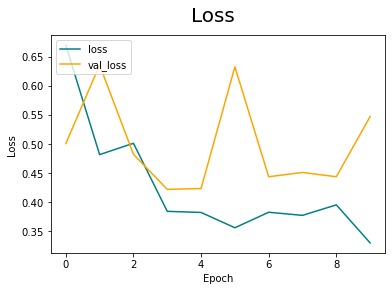

In [42]:
fig = plt.figure()
plt.plot(hist3.history['loss'], color='teal', label='loss')
plt.plot(hist3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

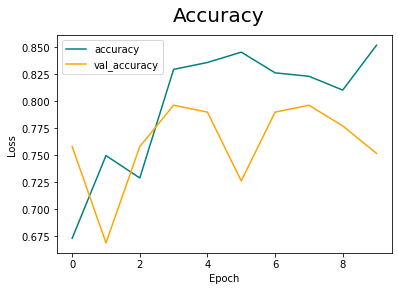

In [43]:
fig = plt.figure()
plt.plot(hist3.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [44]:
#Printing the accuracy of the model
model3.evaluate(X_image_test_stacked,y_test)

7/7 [==============================] - 1s 150ms/step - loss: 0.4293 - accuracy: 0.8214


[0.42931556701660156, 0.8214285969734192]

In [45]:
#Precicting for test dataset
y_pred = model3.predict(X_image_test_stacked)
y_pred_conv = []
for i in y_pred:
    if i[0] > i[1]:
        y_pred_conv.append(0)
    else:
        y_pred_conv.append(1)

7/7 [==============================] - 1s 150ms/step


ACCURACY SCORE:  0.8214285714285714
F1 score:  0.7976878612716762

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        96
           1       0.95      0.69      0.80       100

    accuracy                           0.82       196
   macro avg       0.85      0.82      0.82       196
weighted avg       0.85      0.82      0.82       196

CONFUSION MATRIX:


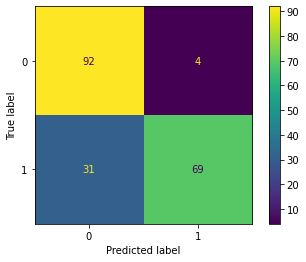

In [46]:
#Plotting confusion matrix and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


print("ACCURACY SCORE: ", accuracy_score(y_test,y_pred_conv))
print('F1 score: ', f1_score(y_test,y_pred_conv))
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred_conv))
a = confusion_matrix(y_test,y_pred_conv)
result = ConfusionMatrixDisplay(a)
print("CONFUSION MATRIX:")
result.plot()
plt.show()